# Notebook Imports

In [1]:
from os import walk
from os.path import join

import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image
import numpy as np

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
import sys
sys.getfilesystemencoding()

'utf-8'

In [3]:
# Takes the file's folder
filepath = r"spam_ham_dataset.csv"
   
# read the CSV file
data = pd.read_csv(filepath)

In [4]:
# print the first five rows
print(data.head())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [5]:
# print the first five rows
print(data.tail())

      Unnamed: 0 label                                               text  \
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
5166          0  
5167          0  
5168          0  
5169          0  
5170          1  


In [6]:
data.shape

(5171, 4)

# Data Cleaning: Checking for Missing Values

In [7]:
# Number of entries with null/None values?
data.text.isnull().sum()

0

In [8]:
# check if there are empty emails (string length zero)
(data.text.str.len() == 0).any()

False

In [9]:
data[4608:4611]

,Unnamed: 0,label,text,label_num
4608,2493,ham,Subject: deal 70422\r\nshould we keep rolling ...,0
4609,4438,spam,Subject: re : real teenager fucked by huge cco...,1
4610,3392,ham,Subject: order confirmation from footlocker . ...,0


# Number of Spam Messages Visualised (Pie Charts)

In [10]:
data.label_num.value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [11]:
amount_of_spam = data.label_num.value_counts()[1]
amount_of_ham = data.label_num.value_counts()[0]

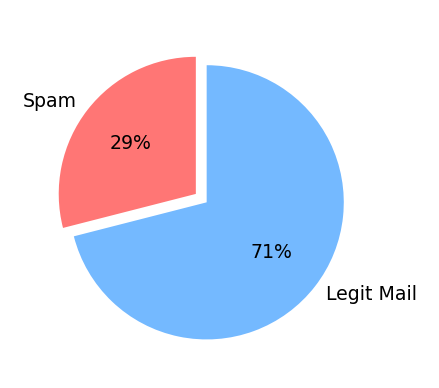

In [12]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.1])
plt.show()

# Pre-processing text using NLP

## Download the NLTK Resources (Tokenizer & Stopwords)


In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Functions for Email Processing

In [15]:
#Function to remove HTML tags. Then test on Email with DOC_ID 2. 
def clean_msg_no_html(message, stemmer=PorterStemmer(), 
                 stop_words=set(stopwords.words('english'))):
    
    # Remove HTML tags
    soup = BeautifulSoup(message, 'html.parser')
    cleaned_text = soup.get_text()
    
    # Converts to Lower Case and splits up the words
    words = word_tokenize(cleaned_text.lower())
    
    filtered_words = []
    
    for word in words:
        # Removes the stop words and punctuation
        if word not in stop_words and word.isalpha():
            filtered_words.append(stemmer.stem(word))
#             filtered_words.append(word) 
    
    return filtered_words

In [16]:
clean_msg_no_html(data.at[2, 'text'])

['subject',
 'neon',
 'retreat',
 'ho',
 'ho',
 'ho',
 'around',
 'wonder',
 'time',
 'year',
 'neon',
 'leader',
 'retreat',
 'time',
 'know',
 'time',
 'year',
 'extrem',
 'hectic',
 'tough',
 'think',
 'anyth',
 'past',
 'holiday',
 'life',
 'go',
 'past',
 'week',
 'decemb',
 'januari',
 'like',
 'think',
 'minut',
 'calend',
 'hand',
 'begin',
 'fall',
 'semest',
 'retreat',
 'schedul',
 'weekend',
 'januari',
 'youth',
 'minist',
 'confer',
 'brad',
 'dustin',
 'connect',
 'week',
 'go',
 'chang',
 'date',
 'follow',
 'weekend',
 'januari',
 'come',
 'part',
 'need',
 'think',
 'think',
 'agre',
 'import',
 'us',
 'get',
 'togeth',
 'time',
 'recharg',
 'batteri',
 'get',
 'far',
 'spring',
 'semest',
 'lot',
 'troubl',
 'difficult',
 'us',
 'get',
 'away',
 'without',
 'kid',
 'etc',
 'brad',
 'came',
 'potenti',
 'altern',
 'get',
 'togeth',
 'weekend',
 'let',
 'know',
 'prefer',
 'first',
 'option',
 'would',
 'retreat',
 'similar',
 'done',
 'past',
 'sever',
 'year',
 'year

In [17]:
# use apply() on all the messages in the dataframe
nested_list = data.text.apply(clean_msg_no_html)

C:\Users\ASUS\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [18]:
doc_ids_spam = data[data.label_num == 1].index
doc_ids_ham = data[data.label_num == 0].index

In [19]:
print(doc_ids_ham)

Int64Index([   0,    1,    2,    4,    5,    6,    8,    9,   12,   14,
            ...
            5156, 5157, 5158, 5160, 5163, 5165, 5166, 5167, 5168, 5169],
           dtype='int64', length=3672)


In [20]:
print(doc_ids_spam)

Int64Index([   3,    7,   10,   11,   13,   15,   24,   35,   40,   41,
            ...
            5146, 5148, 5149, 5151, 5152, 5159, 5161, 5162, 5164, 5170],
           dtype='int64', length=1499)


In [21]:
nested_list_ham = nested_list.loc[doc_ids_ham]

In [22]:
nested_list_ham.shape

(3672,)

In [23]:
nested_list_ham.tail()

5165    [subject, fw, crosstex, energi, driscol, ranch...
5166    [subject, put, ft, transport, volum, decreas, ...
5167    [subject, follow, nom, hpl, take, extra, mmcf,...
5168    [subject, calpin, daili, ga, nomin, juli, ment...
5169    [subject, industri, worksheet, august, activ, ...
Name: text, dtype: object

In [24]:
nested_list_spam = nested_list.loc[doc_ids_spam]

In [25]:
nested_list_spam.shape

(1499,)

In [26]:
nested_list_spam.tail()

5159    [subject, pictur, streamlin, denizen, ajar, ch...
5161    [subject, penni, stock, time, nomad, intern, i...
5162    [subject, anomali, boy, uosda, apaprov, mledm,...
5164    [subject, slutti, milf, want, meet, take, ilaa...
5170    [subject, import, onlin, bank, alert, dear, va...
Name: text, dtype: object

In [27]:
flat_list_ham = [item for sublist in nested_list_ham for item in sublist]
normal_words = pd.Series(flat_list_ham).value_counts()

normal_words.shape[0] # total number of unique words in the non-spam messages

12368

In [28]:
normal_words[:10]

ect        13897
hou         7281
enron       6555
subject     6405
deal        3549
ga          2895
pleas       2737
meter       2718
com         2717
cc          2379
dtype: int64

In [29]:
flat_list_spam = [item for sublist in nested_list_spam for item in sublist]
spammy_words = pd.Series(flat_list_spam).value_counts()

spammy_words.shape[0]

31536

In [30]:
spammy_words[:10]

subject    1659
com         992
http        984
compani     918
price       732
e           638
www         587
inform      557
get         555
font        515
dtype: int64

# Word Cloud of Ham and Spam Messages

In [31]:
THUMBS_UP_FILE = r'thumbs-up.png'
THUMBS_DOWN_FILE = r'thumbs-down.png'

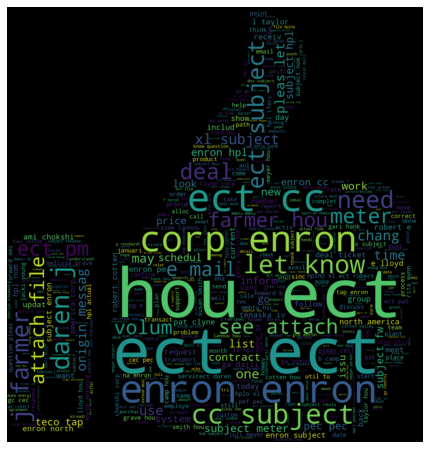

In [32]:
icon = Image.open(THUMBS_UP_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

# Generate the text as a string for the word cloud
ham_str = ' '.join(flat_list_ham)

word_cloud = WordCloud(mask=rgb_array, max_words=500)

word_cloud.generate(ham_str)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

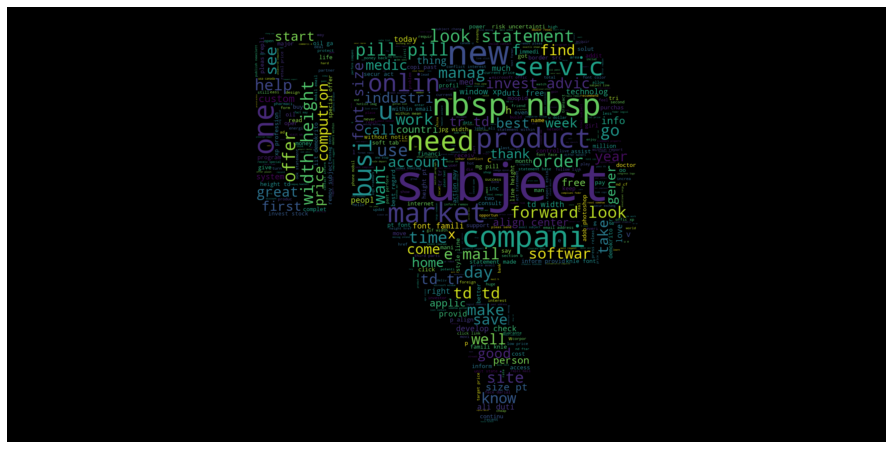

In [33]:
icon = Image.open(THUMBS_DOWN_FILE)
image_mask = Image.new(mode='RGB', size=icon.size, color=(255, 255, 255))
image_mask.paste(icon, box=icon)

rgb_array = np.array(image_mask) # converts the image object to an array

# Generate the text as a string for the word cloud
spam_str = ' '.join(flat_list_spam)

word_cloud = WordCloud(mask=rgb_array, max_words=500)

word_cloud.generate(spam_str)

plt.figure(figsize=[16, 8])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Generate Vocabulary and Dictionary

In [34]:
VOCAB_SIZE = 2500

In [35]:
stemmed_nested_list = data.text.apply(clean_msg_no_html)
flat_stemmed_list = [item for sublist in stemmed_nested_list for item in sublist]

C:\Users\ASUS\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [36]:
unique_words = pd.Series(flat_stemmed_list).value_counts()
print('Number of unique words', unique_words.shape[0])
unique_words.head()

Number of unique words 37907


ect        13908
subject     8064
hou         7289
enron       6555
com         3709
dtype: int64

In [37]:
frequent_words = unique_words[0:VOCAB_SIZE]
print('10 Most common words: \n', frequent_words[:10])

10 Most common words: 
 ect        13908
subject     8064
hou         7289
enron       6555
com         3709
deal        3655
pleas       3243
ga          3072
meter       2721
cc          2391
dtype: int64


# Create Vocabulary DataFrame with a Word_id

In [38]:
word_ids = list(range(0, VOCAB_SIZE))
vocab = pd.DataFrame({'VOCAB_WORD': frequent_words.index.values}, index=word_ids)
vocab.index.name = 'WORD_ID'
vocab.head()

,VOCAB_WORD
WORD_ID,
0,ect
1,subject
2,hou
3,enron
4,com


In [39]:
WORD_ID_FILE = 'word-by-id.csv'
vocab.to_csv(WORD_ID_FILE, index_label=vocab.index.name, header=vocab.VOCAB_WORD.name)

# Generate Features and a Sparse Matrix

## Generating a DataFrame with one word per column

In [40]:
word_columns_df = pd.DataFrame.from_records(stemmed_nested_list.tolist())
word_columns_df.head()

,0,1,2,3,4,5,6,7,8,9,...,3329,3330,3331,3332,3333,3334,3335,3336,3337,3338
0,subject,enron,methanol,meter,follow,note,gave,monday,preliminari,flow,...,None,None,None,None,None,None,None,None,None,None
1,subject,hpl,nom,januari,see,attach,file,hplnol,xl,hplnol,...,None,None,None,None,None,None,None,None,None,None
2,subject,neon,retreat,ho,ho,ho,around,wonder,time,year,...,None,None,None,None,None,None,None,None,None,None
3,subject,photoshop,window,offic,cheap,main,trend,abas,darer,prudent,...,None,None,None,None,None,None,None,None,None,None
4,subject,indian,spring,deal,book,teco,pvr,revenu,understand,teco,...,None,None,None,None,None,None,None,None,None,None


In [41]:
word_columns_df.shape

(5171, 3339)

##  Splitting the Data into a Training and Testing Dataset

In [42]:
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, data.label_num,
                                                   test_size=0.3, random_state=42)

In [43]:
print('Number of training samples', X_train.shape[0])
print('Fraction of training set', X_train.shape[0] / word_columns_df.shape[0])

Number of training samples 3619
Fraction of training set 0.6998646296654419


In [44]:
X_train.index.name = X_test.index.name = 'DOC_ID'
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3329,3330,3331,3332,3333,3334,3335,3336,3337,3338
DOC_ID,,,,,,,,,,,,,,,,,,,,,
1023,subject,tenaska,see,demand,fee,chang,william,price,chang,look,...,None,None,None,None,None,None,None,None,None,None
4586,subject,strong,buy,alert,monthli,newslett,topstock,mid,week,report,...,None,None,None,None,None,None,None,None,None,None
2955,subject,perform,feedback,chosen,one,direct,report,provid,mid,year,...,None,None,None,None,None,None,None,None,None,None
2495,subject,hr,perform,object,binder,good,morn,afternoon,today,everyon,...,None,None,None,None,None,None,None,None,None,None
3353,subject,fw,fwd,fw,draw,school,age,child,pa,fwd,...,None,None,None,None,None,None,None,None,None,None


In [45]:
y_train.head()

1023    0
4586    1
2955    0
2495    0
3353    0
Name: label_num, dtype: int64

## Create Sparse Matrix for training data

In [46]:
word_index = pd.Index(vocab.VOCAB_WORD)
type(word_index[3])

str

In [47]:
def make_sparse_matrix(df, indexed_words, labels):
    """
    Returns sparse matrix as dataframe.
    
    df: A dataframe with words in the columns with a document id as an index (X_train or X_test)
    indexed_words: index of words ordered by word id
    labels: category as a series (y_train or y_test)
    """
    
    nr_rows = df.shape[0]
    nr_cols = df.shape[1]
    word_set = set(indexed_words)
    dict_list = []
    
    for i in range(nr_rows):
        for j in range(nr_cols):
            
            word = df.iat[i, j]
            if word in word_set:
                doc_id = df.index[i]
                word_id = indexed_words.get_loc(word)
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id,
                       'OCCURENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
    
    return pd.DataFrame(dict_list)

In [48]:
%%time
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)

CPU times: total: 1min 39s
Wall time: 1min 39s


In [49]:
sparse_train_df[:5]

,LABEL,DOC_ID,OCCURENCE,WORD_ID
0,0,1023,1,1
1,0,1023,1,164
2,0,1023,1,32
3,0,1023,1,351
4,0,1023,1,275


In [50]:
sparse_train_df.shape

(282638, 4)

In [51]:
sparse_train_df[-5:]

,LABEL,DOC_ID,OCCURENCE,WORD_ID
282633,0,860,1,35
282634,0,860,1,20
282635,0,860,1,131
282636,0,860,1,12
282637,0,860,1,215


# Combine occurences

In [52]:
train_grouped = sparse_train_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum()
train_grouped.head()

OCCURENCE
DOC_ID WORD_ID LABEL           
0      1       0              1
       3       0              1
       6       0              1
       7       0              1
       8       0              1

In [53]:
vocab.at[0, 'VOCAB_WORD']

'ect'

In [54]:
train_grouped = train_grouped.reset_index()
train_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,0,1,0,1
1,0,3,0,1
2,0,6,0,1
3,0,7,0,1
4,0,8,0,1


In [55]:
train_grouped.tail()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
163777,5165,1489,0,1
163778,5165,1536,0,1
163779,5165,1780,0,1
163780,5165,1896,0,1
163781,5165,2022,0,1


In [56]:

train_grouped.shape

(163782, 4)

## Save Training Data as .txt File

In [57]:
TRAINING_DATA_FILE = 'train-data.txt'
TEST_DATA_FILE = 'test-data.txt'
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')

In [58]:
train_grouped.columns

Index(['DOC_ID', 'WORD_ID', 'LABEL', 'OCCURENCE'], dtype='object')

In [59]:
%%time
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)

CPU times: total: 42.9 s
Wall time: 42.9 s


In [60]:
sparse_test_df.shape

(125148, 4)

In [61]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped.head()

,DOC_ID,WORD_ID,LABEL,OCCURENCE
0,8,1,0,2
1,8,3,0,2
2,8,4,0,2
3,8,9,0,1
4,8,11,0,1


In [62]:
test_grouped.shape

(69875, 4)

In [63]:
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

# Creating a full matrix from a sparse matrix

In [64]:
def make_full_matrix(sparse_matrix, nr_words, doc_idx=0, word_idx=1, cat_idx=2, freq_idx=3):
    """
    Form a full matrix from a sparse matrix. Return a pandas dataframe. 
    Keyword arguments:
    sparse_matrix -- numpy array
    nr_words -- size of the vocabulary. Total number of tokens. 
    doc_idx -- position of the document id in the sparse matrix. Default: 1st column
    word_idx -- position of the word id in the sparse matrix. Default: 2nd column
    cat_idx -- position of the label (spam is 1, nonspam is 0). Default: 3rd column
    freq_idx -- position of occurrence of word in sparse matrix. Default: 4th column
    """
    column_names = ['DOC_ID'] + ['CATEGORY'] + list(range(0, VOCAB_SIZE))
    doc_id_names = np.unique(sparse_matrix[:, 0])
    full_matrix = pd.DataFrame(index=doc_id_names, columns=column_names)
    full_matrix.fillna(value=0, inplace=True)
    
    for i in range(sparse_matrix.shape[0]):
        doc_nr = sparse_matrix[i][doc_idx]
        word_id = sparse_matrix[i][word_idx]
        label = sparse_matrix[i][cat_idx]
        occurrence = sparse_matrix[i][freq_idx]
        
        full_matrix.at[doc_nr, 'DOC_ID'] = doc_nr
        full_matrix.at[doc_nr, 'CATEGORY'] = label
        full_matrix.at[doc_nr, word_id] = occurrence
    
    full_matrix.set_index('DOC_ID', inplace=True)
    return full_matrix

In [65]:
%%time
sparse_train_data = np.loadtxt(TRAINING_DATA_FILE, delimiter = ' ', dtype = int)
full_train_data = make_full_matrix(sparse_train_data, VOCAB_SIZE)

CPU times: total: 5.41 s
Wall time: 5.42 s


In [66]:
 full_train_data

,CATEGORY,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,0,0,2,0,4,0,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0
5160,0,0,1,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
5162,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Training the Naive Bayes Model

## Calculating the probability of spam

In [67]:
prob_spam = full_train_data.CATEGORY.sum()/full_train_data.CATEGORY.size
prob_spam#The probablity of spam messages

0.29510914617297596

## Total number of words/tokens

In [68]:
full_train_features = full_train_data.loc[:,full_train_data.columns != 'CATEGORY']
full_train_features

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5158,0,2,0,4,0,0,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
5160,0,1,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5162,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
email_length = full_train_features.sum(axis=1)
email_length.shape[0]

3619

In [70]:
total_wc = email_length.sum()
total_wc

282638

## Number of tokens in spam and ham emails

In [71]:
spam_length = email_length[full_train_data.CATEGORY == 1]
spam_length.shape

(1068,)

In [72]:
spam_wc = spam_length.sum()
spam_wc

82898

In [73]:
ham_length = email_length[full_train_data.CATEGORY == 0]
ham_length.shape

(2551,)

In [74]:
##Checking if everything is in order 
email_length.shape[0] - spam_length.shape[0] - ham_length.shape[0]

0

In [75]:
ham_wc = ham_length.sum()
ham_wc

199740

In [76]:
ham_wc + spam_wc - total_wc

0

In [77]:
print('Average number of words in spam emails {:.0f}'.format(spam_wc/spam_length.shape[0]))
print('Average number of words in ham emails {:.0f}'.format(ham_wc/ham_length.shape[0]))

Average number of words in spam emails 78
Average number of words in ham emails 78


## Summing the tokens occuring in spam

In [78]:
full_train_features.shape

(3619, 2500)

In [79]:
train_spam_tokens = full_train_features.loc[full_train_data.CATEGORY == 1]
train_spam_tokens

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5148,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5149,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
train_spam_tokens.shape

(1068, 2500)

In [81]:
summed_spam_tokens = train_spam_tokens.sum(axis = 0) + 1#Laplace smoothing
summed_spam_tokens.shape

(2500,)

## Summing the tokens occuring in ham

In [82]:
train_ham_tokens = full_train_features.loc[full_train_data.CATEGORY == 0]
train_ham_tokens

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
DOC_ID,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5157,0,2,0,3,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5158,0,2,0,4,0,0,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
5160,0,1,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
train_ham_tokens.shape

(2551, 2500)

In [84]:
summed_ham_tokens = train_ham_tokens.sum(axis = 0) + 1#Laplace smoothing
summed_ham_tokens.shape

(2500,)

In [85]:
summed_ham_tokens.tail()

2495     1
2496     7
2497    11
2498     4
2499     2
dtype: int64

In [86]:
train_ham_tokens[2499].sum() + 1#Correspong to the above output

2

# P(Token | Spam) = Probability that a token occurs given that the email is spam

In [87]:
prob_token_spam = summed_spam_tokens/ (spam_wc + VOCAB_SIZE)
prob_token_spam

0       0.000129
1       0.013829
2       0.000105
3       0.000012
4       0.008853
          ...   
2495    0.000222
2496    0.000047
2497    0.000012
2498    0.000164
2499    0.000222
Length: 2500, dtype: float64

In [88]:
prob_token_spam.sum()

1.0

# P(Token | Ham) = Probability that a token occurs given that the email is Non-spam

In [89]:
prob_token_ham = summed_ham_tokens/ (ham_wc + VOCAB_SIZE)
prob_token_ham

0       0.047607
1       0.021781
2       0.024921
3       0.021544
4       0.006819
          ...   
2495    0.000005
2496    0.000035
2497    0.000054
2498    0.000020
2499    0.000010
Length: 2500, dtype: float64

In [90]:
prob_token_ham.sum()

1.0

# P(Token) = Probability that token occurs

In [91]:
prob_token_all = full_train_features.sum(axis= 0)/ total_wc

In [92]:
prob_token_all

0       0.034097
1       0.019757
2       0.017857
3       0.015412
4       0.007547
          ...   
2495    0.000064
2496    0.000032
2497    0.000035
2498    0.000057
2499    0.000067
Length: 2500, dtype: float64

In [93]:
prob_token_all.sum()

1.0

In [94]:
#prob_token_all = np.array(prob_token_all)

In [95]:
print(type(prob_token_all))

<class 'pandas.core.series.Series'>


# Saving trained model

In [96]:
TOKEN_SPAM_PROB_FILE = 'prob-spam.txt'
TOKEN_HAM_PROB_FILE = 'prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = 'prob-all-tokens.txt'

In [97]:
np.savetxt(TOKEN_SPAM_PROB_FILE, prob_token_spam)
np.savetxt(TOKEN_HAM_PROB_FILE, prob_token_ham)
np.savetxt(TOKEN_ALL_PROB_FILE, prob_token_all)

# Preparing Test Model

In [98]:
%%time
sparse_test_data = np.loadtxt(TEST_DATA_FILE, delimiter = ' ', dtype = int)
full_test_data = make_full_matrix(sparse_test_data, VOCAB_SIZE)

CPU times: total: 2.36 s
Wall time: 2.37 s


In [99]:
X_test = full_test_data.loc[:,full_test_data.columns != 'CATEGORY']
Y_test = full_test_data.CATEGORY

In [100]:
TEST_FEATURE_MATRIX = 'test-features.txt'
TEST_TARGET_FILE = 'test-target.txt'

In [101]:
np.savetxt(TEST_TARGET_FILE, Y_test)
np.savetxt(TEST_FEATURE_MATRIX, X_test)

# Calculating Joint Probability

## Set the prior
$$P(Spam\, | \,X) = \frac{P(X \, | \, Spam \,) \, P(Spam)}{P(X)}$$

In [102]:
prob_token_spam = np.array(prob_token_spam)
prob_token_ham = np.array(prob_token_ham)

In [103]:
#We will do calculations using log values because the values are small and it will thus spread out, making our plots look good
np.log(prob_token_spam)

array([ -8.95718269,  -4.28096114,  -9.15785338, ..., -11.35507796,
        -8.71602063,  -8.41063898])

In [112]:
PROB_SPAM = 0.3116
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_token_all + 1e-9)) + np.log(PROB_SPAM)


In [114]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_token_all+ 1e-9)) +(np.log(1 - PROB_SPAM)) 

In [113]:
joint_log_spam[:5]

DOC_ID
8    -127.330139
12    -62.788908
14    -32.429673
17   -188.661366
19    -11.533631
dtype: float64

In [115]:
print(type(joint_log_spam))

<class 'pandas.core.series.Series'>


In [116]:
joint_log_ham[:5]

DOC_ID
8     12.435141
12     4.405263
14     2.243491
17    15.575659
19    -3.283545
dtype: float64

# Making Predictions
## Checking for higher joint probability
$$P(Spam \, | \, X) \, > \, P(Ham \, | \, X)$$

In [117]:
prediction = joint_log_spam > joint_log_ham

In [119]:
prediction

DOC_ID
8       False
12      False
14      False
17      False
19      False
        ...  
5166    False
5167    False
5168    False
5169    False
5170     True
Length: 1552, dtype: bool

In [121]:
prediction*1

DOC_ID
8       0
12      0
14      0
17      0
19      0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Length: 1552, dtype: int32

# Metrics and evaluation

## Accuracy

In [123]:
correct_docs = (Y_test == prediction).sum()
print('Docs classified correctly = ', correct_docs)
num_docs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly = ', num_docs_wrong)

Docs classified correctly =  1466
Docs classified incorrectly =  86


In [124]:
# Accuracy
correct_docs/len(X_test)

0.9445876288659794

In [125]:
fraction_wrong = num_docs_wrong/len(X_test)
fraction_wrong

0.055412371134020616

In [132]:
np.unique(prediction, return_counts = True)

(array([False,  True]), array([1083,  469], dtype=int64))

In [133]:
true_pos = (Y_test == 1) & (prediction == 1)# We use single ampersand which is a bitwise operator to compare element by element
true_pos

DOC_ID
8       False
12      False
14      False
17      False
19      False
        ...  
5166    False
5167    False
5168    False
5169    False
5170     True
Length: 1552, dtype: bool

In [134]:
true_pos.sum()#Number of true positives in the set

407

In [135]:
false_pos = (Y_test == 0) & (prediction == 1)# We use single ampersand which is a bitwise operator to compare element by element
false_pos

DOC_ID
8       False
12      False
14      False
17      False
19      False
        ...  
5166    False
5167    False
5168    False
5169    False
5170    False
Length: 1552, dtype: bool

In [136]:
false_pos.sum()

62

In [137]:
false_neg = (Y_test == 1) & (prediction == 0)# We use single ampersand which is a bitwise operator to compare element by element
false_neg

DOC_ID
8       False
12      False
14      False
17      False
19      False
        ...  
5166    False
5167    False
5168    False
5169    False
5170    False
Length: 1552, dtype: bool

In [138]:
false_neg.sum()

24

In [139]:
true_neg = (Y_test == 0) & (prediction == 0)# We use single ampersand which is a bitwise operator to compare element by element
true_neg

DOC_ID
8        True
12       True
14       True
17       True
19       True
        ...  
5166     True
5167     True
5168     True
5169     True
5170    False
Length: 1552, dtype: bool

In [140]:
true_neg.sum()

1059

# Recall score

In [141]:
recall_score = true_pos.sum()/(true_pos.sum() + false_neg.sum())
recall_score

0.9443155452436195

# Precision Score

In [142]:
precision_score = true_pos.sum()/(true_pos.sum() + false_pos.sum())
precision_score

0.8678038379530917

# F1 score

In [143]:
f_score = 2*(precision_score*recall_score)/(recall_score+precision_score)
f_score

0.9044444444444444